# Non-rigid ODE systems


In [130]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import math
import numbers
import scipy as sp
from scipy.optimize import fsolve

In [177]:
def drawPlot(y_arr, t_arr):
    u, v = y_arr.transpose()

    fig, ax = plt.subplots(2, figsize=(10, 10))

    ax[0].scatter(t_arr, u, label='u')
    ax[0].scatter(t_arr, v, label='v')
    
    ax[1].scatter(u, v, label='phase')

    ax[0].legend()
    ax[1].legend()
    plt.show()

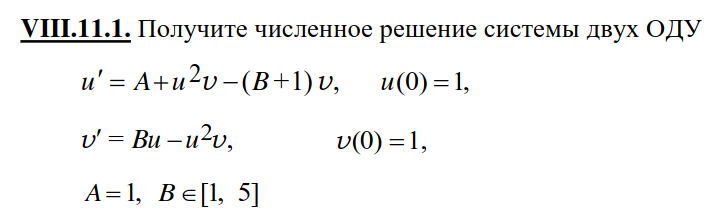

In [178]:
A = 1
B = 3
t0 = 0
u0 = 1
v0 = 1

def F(t, y):
    u, v = y
    return np.array([
        A + u*u*v - (B-1)*v,
        B*u - u*u*v
    ])

### Runge-Kutta method
Runge-Kutta 4th order [method on Wikipedia](https://en.wikipedia.org/w/index.php).

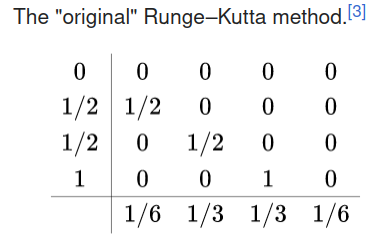

In [179]:
def solveOdeRK4(y0, t_start, t_end, h, f):
    y_arr = []
    t_arr = []

    y_arr.append(y0)
    t_arr.append(t_start)

    n = int((t_end - t_start)/h)
    
    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]
        
        k1 = f(tn, yn)
        k2 = f(tn + 0.5*h, yn + 0.5*k1*h)
        k3 = f(tn + 0.5*h, yn + 0.5*k2*h)
        k4 = f(tn + h, yn + k3*h)
        
        yn1 = yn + h*((1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4)
        tn1 = tn + h
        
        y_arr.append(yn1)
        t_arr.append(tn1)
    
    return np.array(y_arr), np.array(t_arr)

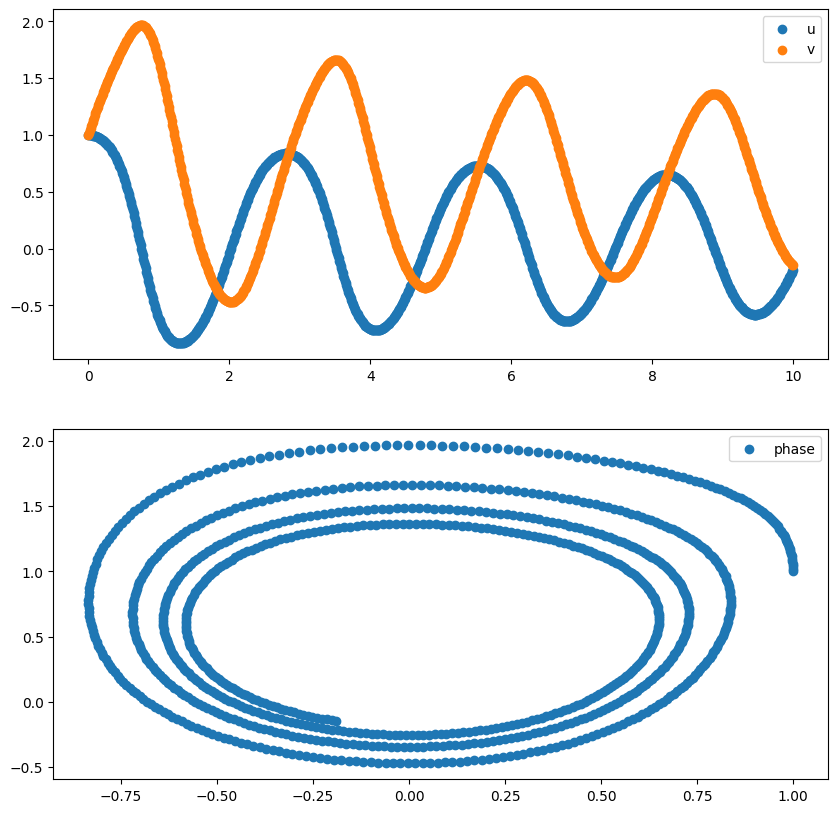

In [180]:
y_arr, t_arr = solveOdeRK4(np.array([u0, v0]), t0, 10, 0.01, F)
drawPlot(y_arr, t_arr)

### Adams method
Adam's 2nd order multistep [method on Wikipedia](https://en.wikipedia.org/wiki/Linear_multistep_method).

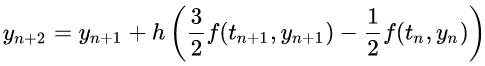

In [181]:
def solveOdeAdams2(y0, t_start, t_end, h, f):
    y_arr, t_arr = solveOdeRK4(y0, t_start, t_start + 1*h, h, f)
    y_arr = list(y_arr)
    t_arr = list(t_arr)
    
    n = int((t_end - t_start)/h) - 2

    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]
    
        yn1 = y_arr[i+1]
        tn1 = t_arr[i+1]
    
        yn2 = yn1 + h*((3/2)*f(tn1, yn1) - (1/2)*f(tn, yn))
        tn2 = tn1 + h
        
        y_arr.append(yn2)
        t_arr.append(tn2)

    return np.array(y_arr), np.array(t_arr)


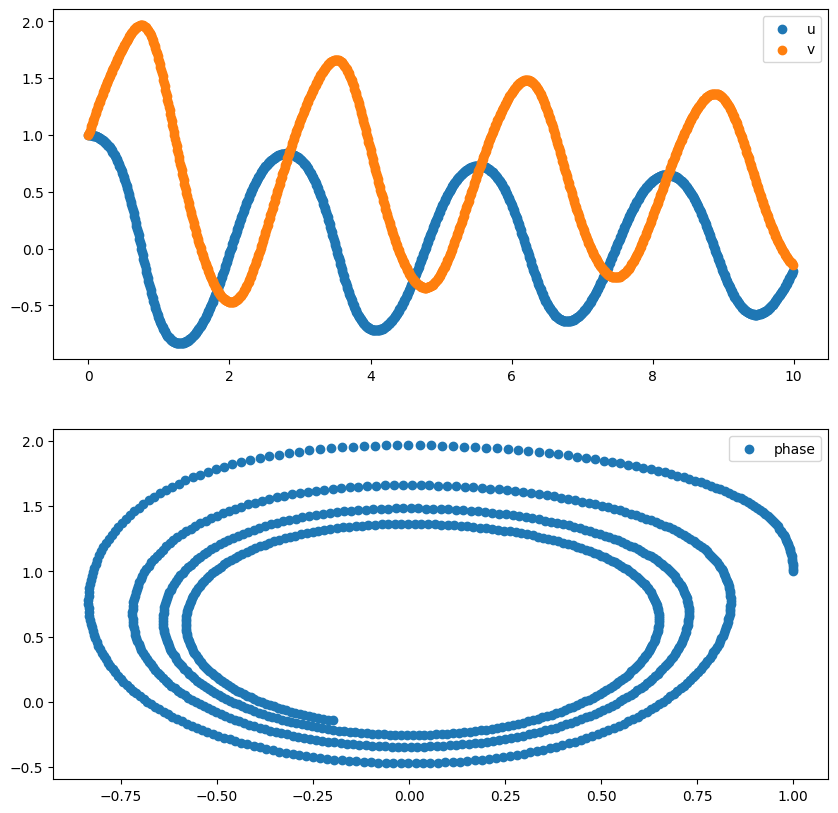

In [182]:
y_arr, t_arr = solveOdeAdams2(np.array([u0, v0]), t0, 10, 0.01, F)
drawPlot(y_arr, t_arr)

### Backward Differentiation Formula
BDF 2nd order multistep [method on Wikipedia](https://en.wikipedia.org/w/index.php?title=Backward_differentiation_formula).

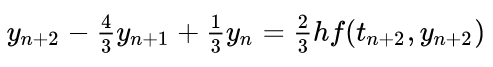

In [183]:
def solveOdeBDF2(y0, t_start, t_end, h, f):
    y_arr, t_arr = solveOdeRK4(y0, t_start, t_start + 1*h, h, f)
    y_arr = list(y_arr)
    t_arr = list(t_arr)
    
    n = int((t_end - t_start)/h) - 2

    for i in range(n):
        yn = y_arr[i]
        yn1 = y_arr[i+1]

        tn1 = t_arr[i+1]
        tn2 = tn1 + h
        
        snae = lambda yn2: yn2 - (4/3)*yn1 + (1/3)*yn - (2/3)*h*f(tn2, yn2)
        yn2 = fsolve(snae, yn1)

        y_arr.append(yn2)
        t_arr.append(tn2)

    return np.array(y_arr), np.array(t_arr)



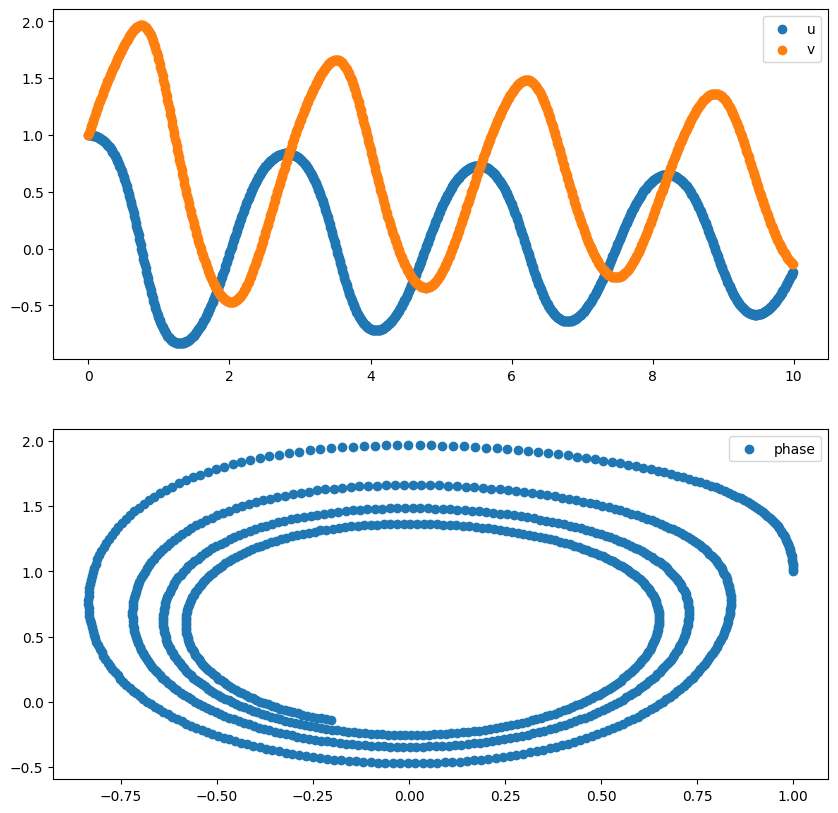

In [184]:
y_arr, t_arr = solveOdeBDF2(np.array([u0, v0]), t0, 10, 0.01, F)
drawPlot(y_arr, t_arr)

# Rigid ODE systems

In [188]:
def drawPlot(y_arr, t_arr):
    u, v, w = y_arr.transpose()

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.scatter(t_arr, u, label='u')
    ax.scatter(t_arr, v, label='v')
    ax.scatter(t_arr, w, label='w')
    
    ax.legend()
    plt.show()

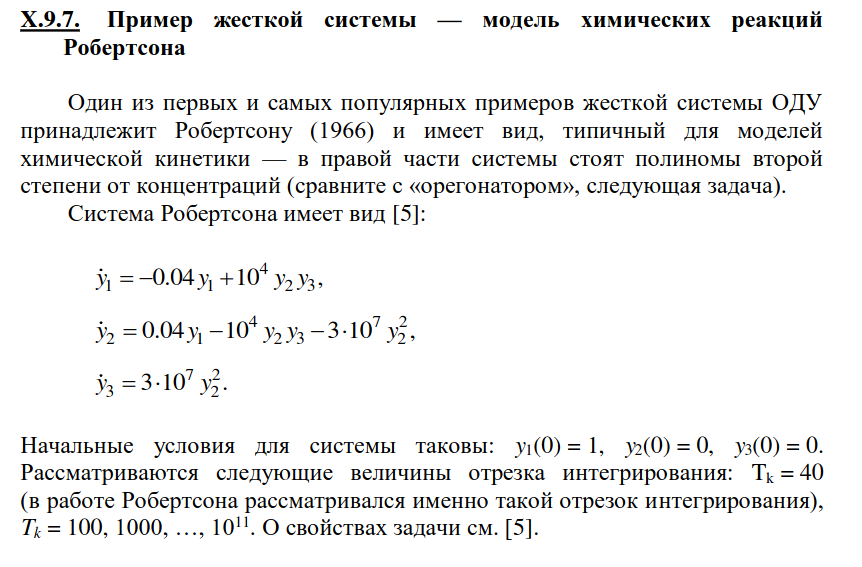

In [189]:
t0 = 0
tk = 1000
u0 = 1
v0 = 0
w0 = 0

def F(t, y):
    u, v, w = y
    return np.array([
        -0.04*u + (10**4)*v*w,
        0.04*u - (10**4)*v*w - 3*(10**7)*(v**2),
        3*(10**7)*(v**2)
    ])

## Diagonally Implicit Runge–Kutta method

DIRK 2nd order [method on Wikipedia](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Implicit_methods).

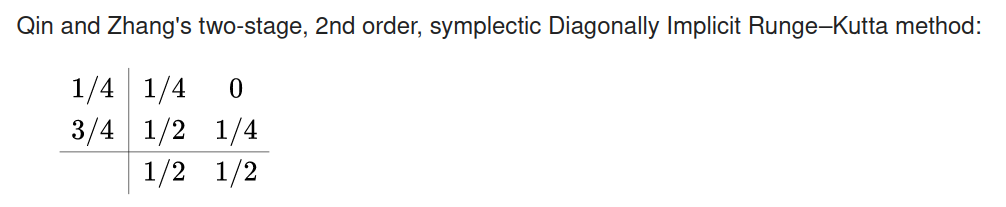

In [141]:
def solveOdeDIRK2(y0, t_start, t_end, h, f):
    y_arr = []
    t_arr = []
    
    y_arr.append(y0)
    t_arr.append(t_start)

    n = int((t_end - t_start)/h)
    
    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]

        k1_snae = lambda k: k - f(tn + (1/4)*h, yn + (1/4)*h*k)
        k2_snae = lambda k: k - f(tn + (3/4)*h, yn + (1/2)*h*k1 + (1/4)*h*k)
        
        k1 = fsolve(k1_snae, yn)
        k2 = fsolve(k2_snae, yn)
        
        yn1 = yn + h*((1/2)*k1 + (1/2)*k2)
        tn1 = tn + h
        
        y_arr.append(yn1)
        t_arr.append(tn1)

    return np.array(y_arr), np.array(t_arr)


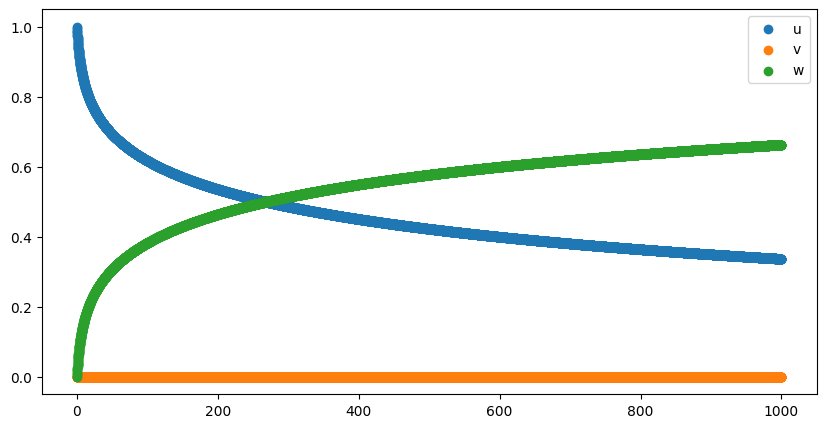

In [142]:
y_arr, t_arr = solveOdeDIRK2(np.array([u0, v0, w0]), t0, tk, 0.1, F)
drawPlot(y_arr, t_arr)

## Rosenbrock method

Rosenbrock's 2nd order [method on Wikipedia](https://en.wikipedia.org/wiki/Rosenbrock_methods).

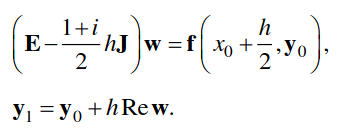

In [190]:
def solveOdeCROS2(y0, t_start, t_end, h, f):
    y_step = 10**(-5)
    
    y_arr = []
    t_arr = []
    
    y_arr.append(y0)
    t_arr.append(t_start)

    n = int((t_end - t_start)/h)
    
    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]

        J = (f(tn, yn + y_step) - f(tn, yn - y_step)) / (2*y_step)
        E = np.eye(y0.size)

        A = E - ((1+1j)/2)*h
        b = f(tn + h/2, yn)
        
        w = np.linalg.solve(A, b)
        
        yn1 = yn + h * w.real
        tn1 = tn + h
        
        y_arr.append(yn1)
        t_arr.append(tn1)

    return np.array(y_arr), np.array(t_arr)


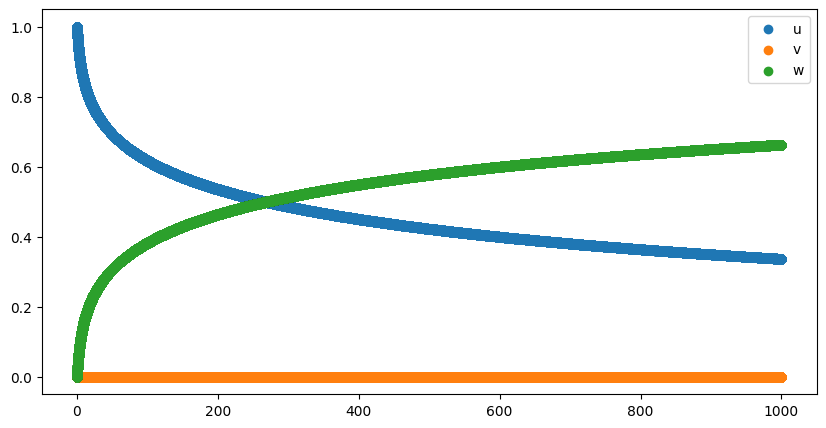

In [196]:
y_arr, t_arr = solveOdeCROS2(np.array([u0, v0, w0]), t0, tk, 0.0002, F)
drawPlot(y_arr, t_arr)

## Nordsik representation of Adams 4th order method

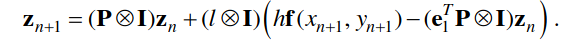
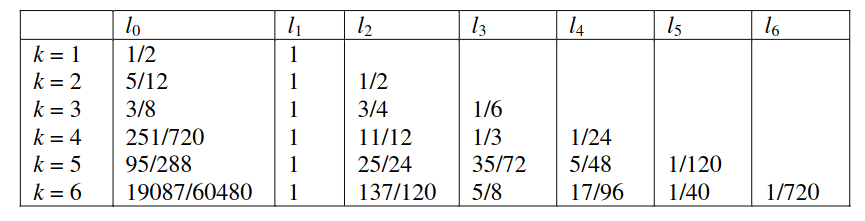

In [146]:
def solveOdeNordsikAdams4(y0, t_start, t_end, h, f): 
    order = 4
    
    y_arr = []
    t_arr = []
    
    y_arr.append(y0)
    t_arr.append(t_start)

    n = int((t_end - t_start)/h)

    e = np.array([0, 1, 0, 0, 0])
    L = np.array([251/720, 1, 11/12, 1/3, 1/24])
    P = sp.linalg.pascal(order + 1, kind = 'upper')
    
    zn1 = np.zeros((order + 1, y0.size))
    zn1[0] = y0
    zn1[1] = h*f(t_start, y0)

    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]
        zn = zn1

        inter = P @ zn
        zn1 = inter + np.outer(L, (h*f(tn, yn) - np.dot(e, inter)))

        yn1 = zn1[0]
        tn1 = tn + h
        
        y_arr.append(yn1)
        t_arr.append(tn1)

    return np.array(y_arr), np.array(t_arr)


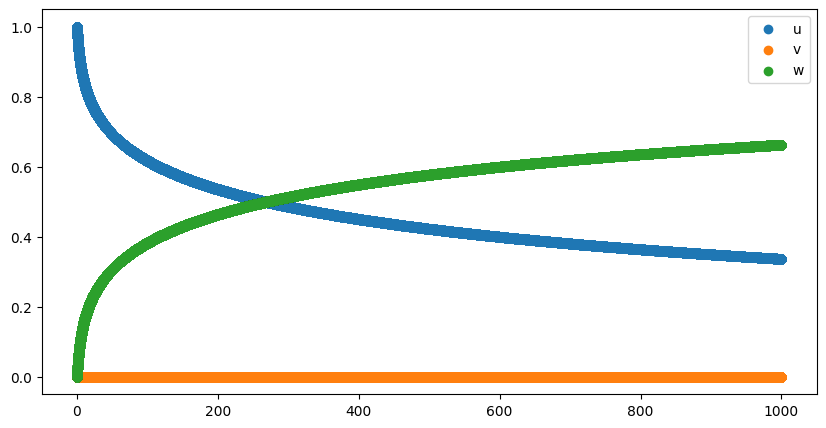

In [151]:
y_arr, t_arr = solveOdeNordsikAdams4(np.array([u0, v0, w0]), t0, tk, 0.0002, F)
drawPlot(y_arr, t_arr)

## Step varying

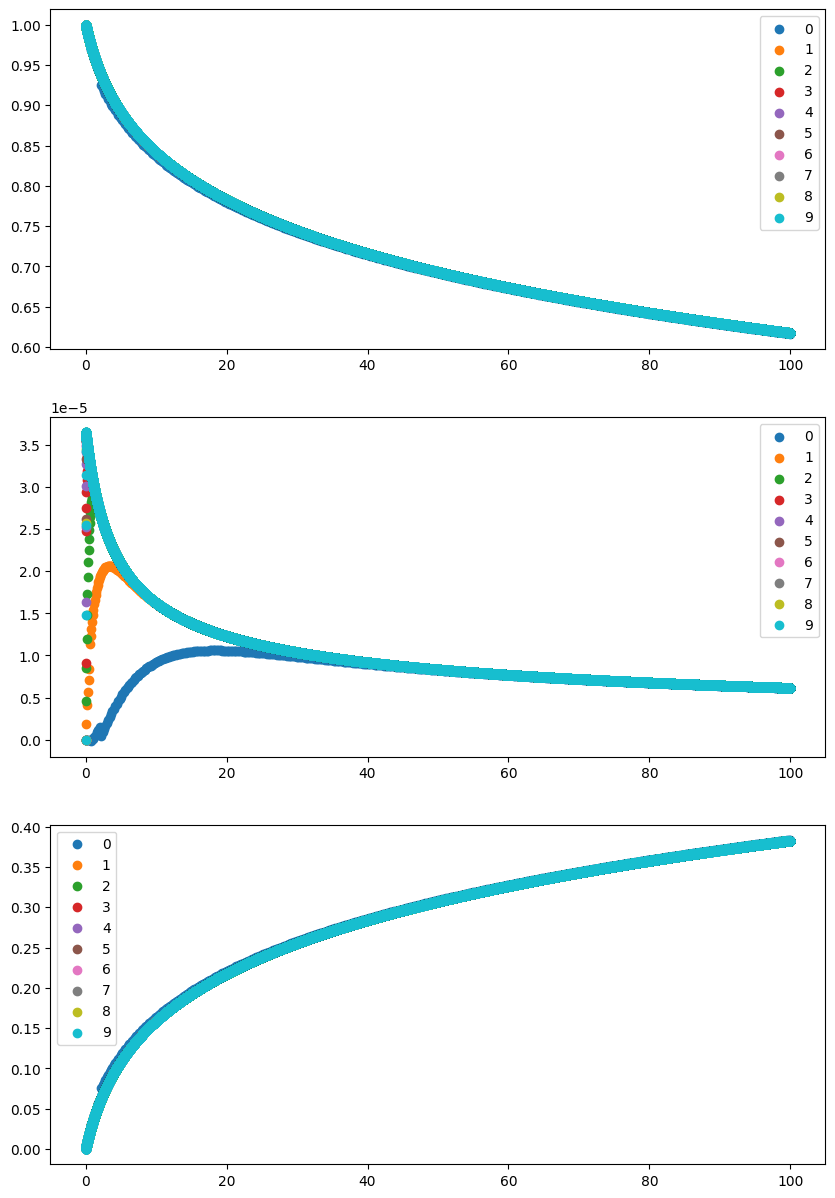

In [173]:
def drawPlot(arr_y_arr, arr_t_arr):
    fig, axes = plt.subplots(3, figsize=(10, 15))

    for i in range(len(arr_y_arr)):
        u, v, w = arr_y_arr[i].transpose()
        t_arr = arr_t_arr[i]
        
        axes[0].scatter(t_arr, u, label=i)
        axes[1].scatter(t_arr, v, label=i)
        axes[2].scatter(t_arr, w, label=i)

    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    
    plt.show()

def vary_step(h_start, tend, n):
    arr_y_arr = []
    arr_t_arr = []
    h = h_start
    
    for i in range(n):
        y_arr, t_arr = solveOdeDIRK2(np.array([u0, v0, w0]), t0, tend, h, F)
        h /= 2
        
        arr_y_arr.append(y_arr)
        arr_t_arr.append(t_arr)

    return arr_y_arr, arr_t_arr

arr_y_arr, arr_t_arr = vary_step(0.2, 100, 10)
drawPlot(arr_y_arr, arr_t_arr)
    

## Similar results

[Here is a link](https://www.keldysh.ru/pages/comma/html/ds/chem.html) to the similar work of the Robertson ODE solution.

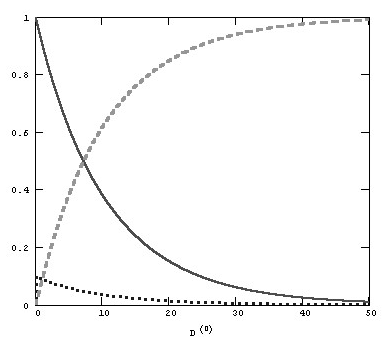